## Problem Statement

There is a new mobile company and the CEO wants to give tough fight to big companies like Apple,Samsung etc.

He has no idea of how to estimate price of mobiles his company creates. A simple assumption of the prices will not be profitable in this competitive world. To solve this problem he collects sales data of mobile phones of various companies.

Thus, the CEO has hired you to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price.
You have to predict a price range indicating how high the price is.

## Data Definition

**battery_power:** Total energy a battery can store in one time measured in mAh<br> 

**clock_speed:** Speed at which microprocessor executes instructions<br>

**fc:** Front Camera mega pixels<br>

**int_memory:** Internal Memory in Gigabytes<br>

**m_dep:** Mobile Depth in cm<br>

**mobile_wt:** Weight of mobile phone<br>

**n_cores:** Number of cores of processor<br>

**pc:** Primary Camera mega pixels<br>

**px_height:** Pixel Resolution Height<br>

**px_width:** Pixel Resolution Width<br>

**ram:** Random Access Memory in Mega Bytes<br>

**sc_h:** Screen Height of mobile in cm<br>

**sc_w:** Screen Width of mobile in cm<br>

**talk_time:** longest time that a single battery charge will last when you are<br>

**price_range:** This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

<a id='import_lib'></a>
#  Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# import various functions to perform classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score 

In [2]:
plt.rcParams['figure.figsize'] = [15,8]

<a id='RD'></a>
#  Read Data

In [3]:
# read csv file using pandas
df_mobile = pd.read_csv(r"C:\Users\Sinegalatha\Desktop\Imarticus Learning\0.MKCE\7.KNN\2 Project\Market Positioning of Mobile\Dataset\Mobile_data.csv")

# display the top 5 rows of the dataframe
df_mobile.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1


#### Dimensions of the data

In [4]:
# 'shape' function gives the total number of rows and columns in the data
df_mobile.shape

(2000, 15)

<a id='data_preparation'></a>
# Data Analysis and Preparation

**Check for the data type**

In [5]:
# 'dtypes' gives the data type for each column
df_mobile.dtypes

battery_power      int64
clock_speed      float64
fc                 int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
price_range        int64
dtype: object

#### From the above output, it is clear that the data type of all the variables except 'clock_speed' and 'm_dep' is int64. The data type of 'clock_speed' and 'm_dep' is float64





In [6]:
df_mobile.columns

Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time', 'price_range'],
      dtype='object')

In [7]:

df_features = df_mobile.iloc[:, df_mobile.columns != 'price_range']
df_target = df_mobile.iloc[:, df_mobile.columns == 'price_range']

Use the dataframe containing features (df_features) for further analysis.

<a id='Summary_Statistics'></a>
###  Summary Statistics

**For numerical variables, use the describe()**

In [8]:

df_features.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.309500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000
std,439.418206,0.816004,4.341444,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000


<a id='distribution_variables'></a>
###  Distribution of Variables

#### Distribution of numeric independent variables.

For the independent numeric variables, we plot the histogram to check the distribution of the variables.

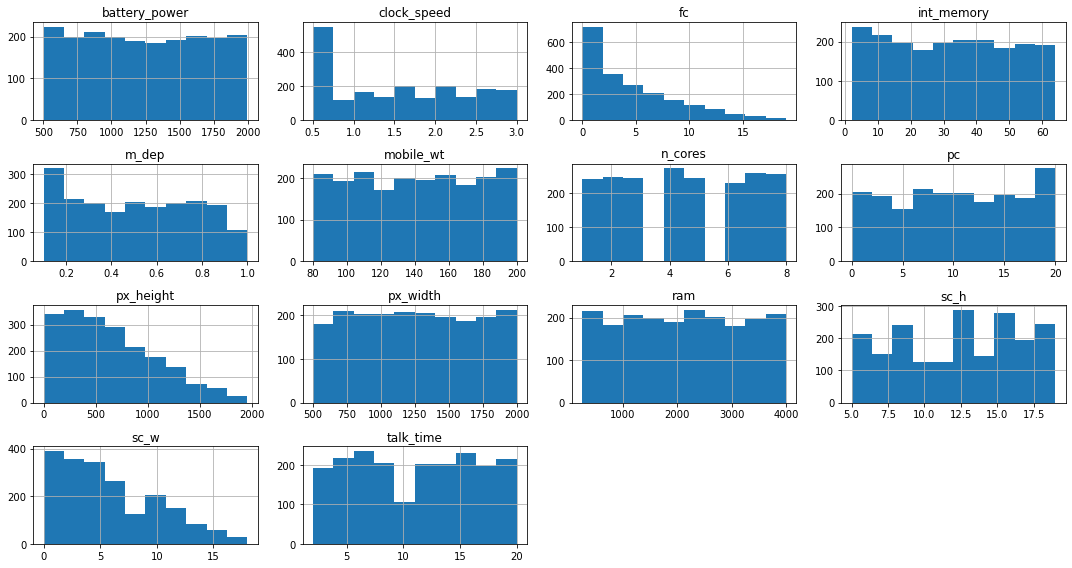

In [9]:

df_features.hist()

plt.tight_layout()

plt.show()  

#### Distribution of dependent variable.

In [10]:

class_frequency = df_target.price_range.value_counts()
class_frequency

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

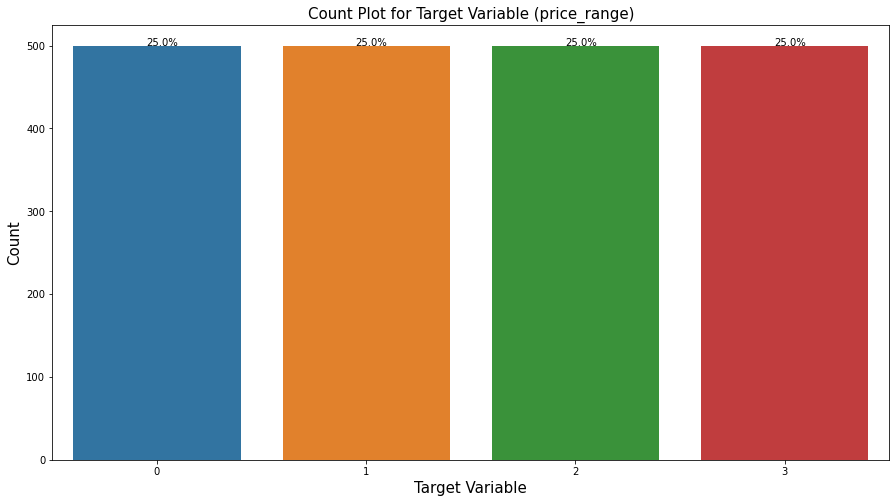

In [11]:
# plot the countplot of the variable 'price_range'
sns.countplot(x = df_target.price_range)
plt.text(x = -0.05, y = df_target.price_range.value_counts()[0], s = str((class_frequency[0])*100/len(df_target.price_range)) + '%')
plt.text(x = 0.95, y = df_target.price_range.value_counts()[1], s = str((class_frequency[1])*100/len(df_target.price_range)) + '%')
plt.text(x = 1.95, y = df_target.price_range.value_counts()[2], s = str((class_frequency[2])*100/len(df_target.price_range)) + '%')
plt.text(x = 2.95, y = df_target.price_range.value_counts()[3], s = str((class_frequency[3])*100/len(df_target.price_range)) + '%')
plt.title('Count Plot for Target Variable (price_range)', fontsize = 15)
plt.xlabel('Target Variable', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

### There are equal observations in each class thus we see that there is a perfect balance between the four classes of the target variable.

#### Group the dataframe by the price range

#### Generally, customers mainly look for ram while purchasing mobile. So, lets see what is the relation between ram and price_range

In [12]:
price_group = df_mobile.groupby('price_range')

In [13]:
# find the average ram in each price group
price_group['ram'].mean()

price_range
0     785.314
1    1679.490
2    2582.816
3    3449.232
Name: ram, dtype: float64

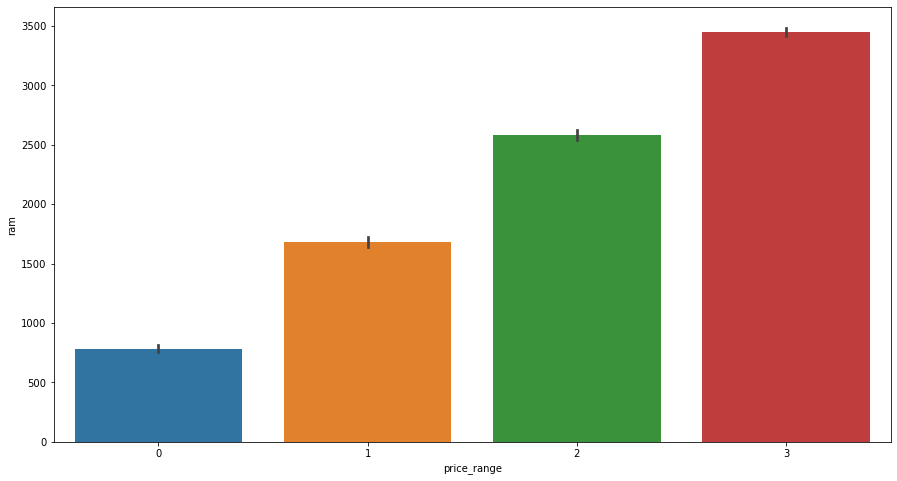

In [14]:
# create a barplot for price_range and ram
sns.barplot('price_range', 'ram', data=df_mobile)

**Interpretation:** The price of the mobile increases as the ram increases.

<a id='correlation'></a>
###  Correlation

**Compute a correlation matrix**

In [15]:

corrmat = df_features.corr()

corrmat

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
battery_power,1.000000,0.011482,0.033334,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510
clock_speed,0.011482,1.000000,-0.000434,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432
fc,0.033334,-0.000434,1.000000,-0.029133,-0.001791,0.023618,-0.013356,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829
int_memory,-0.004004,0.006545,-0.029133,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790
m_dep,0.034085,-0.014364,-0.001791,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003
mobile_wt,0.001844,0.012350,0.023618,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209
n_cores,-0.029727,-0.005724,-0.013356,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148
pc,0.031441,-0.005245,0.644595,-0.033273,0.026282,0.018844,-0.001193,1.000000,-0.018465,0.004196,0.028984,0.004938,-0.023819,0.014657
px_height,0.014901,-0.014523,-0.009990,0.010441,0.025263,0.000939,-0.006872,-0.018465,1.000000,0.510664,-0.020352,0.059615,0.043038,-0.010645
px_width,-0.008402,-0.009476,-0.005176,-0.008335,0.023566,0.000090,0.024480,0.004196,0.510664,1.000000,0.004105,0.021599,0.034699,0.006720


**Plot the heatmap for the diagonal correlation matrix**

A correlation matrix is a symmetric matrix. Plot only the lower triangular entries using a heatmap.

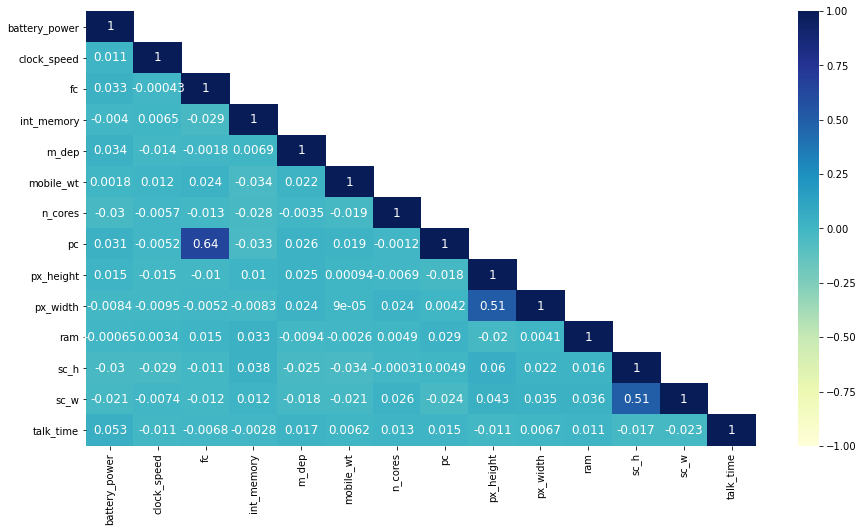

In [16]:

mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask, k=1)] = True
sns.heatmap(corrmat, cmap = 'YlGnBu', vmax = 1.0, vmin = -1.0, annot = True, annot_kws = {"size": 12}, mask = mask)

plt.show()

### From the above heatmap, it can see that most of the continuous variables are not correlated with each other since the correlation coefficients are close to zero. The maximum positive correlation is 0.64 between 'fc' and 'pc'. SImilarly 'px_height' and 'px_weight' have the correlation of 0.51 and 'sc_h' and 'sc_w' also havve the same correlation value of 0.51.


<a id='outliers'></a>
###  Discover Outliers 

**Plot the boxplot for numeric data**

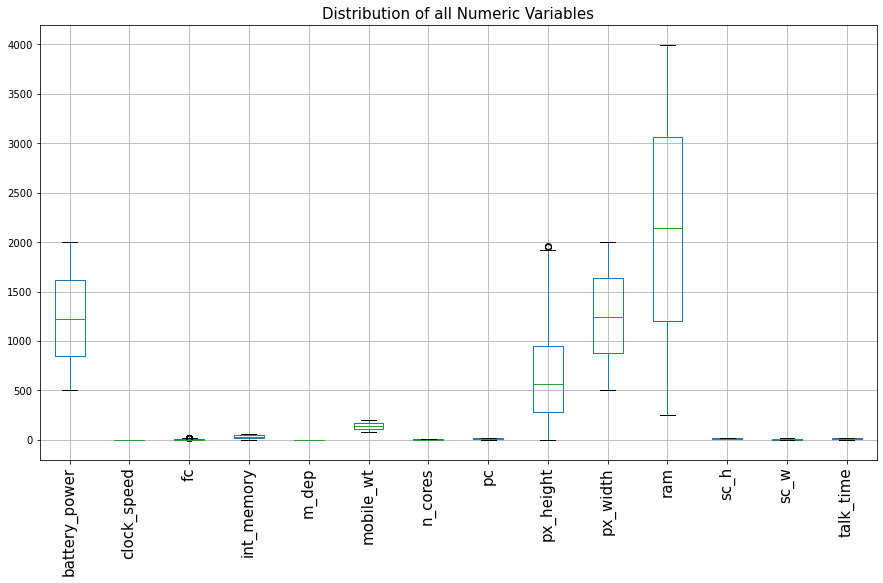

In [17]:

df_features.boxplot()

plt.title('Distribution of all Numeric Variables', fontsize = 15)

plt.xticks(rotation = 'vertical', fontsize = 15)
plt.show()

#### Some boxplots of variables are not seen because of the extreme values im other variables. So let's plot a separate boxplot for these variables

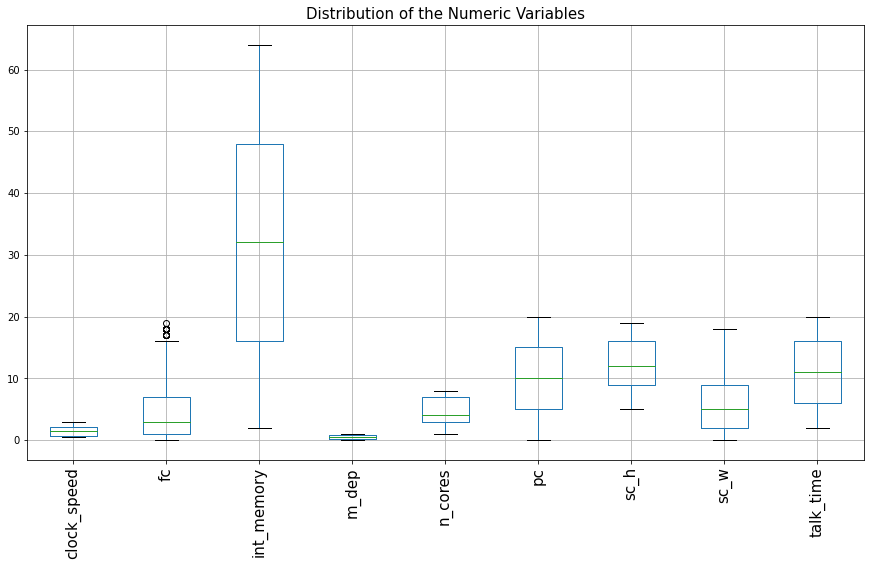

In [18]:

df_features.drop(['battery_power', 'mobile_wt', 'px_height', 'px_width', 'ram'], axis = 1).boxplot()

plt.title('Distribution of the Numeric Variables', fontsize = 15)
plt.xticks(rotation = 'vertical', fontsize = 15)
plt.show()

**We can see that only 'fc' and 'px_height' have a few outliers. But they are not visible clearly. So we will plot separate boxplots for these two. Otherwise all the other variables do not have any outliers**

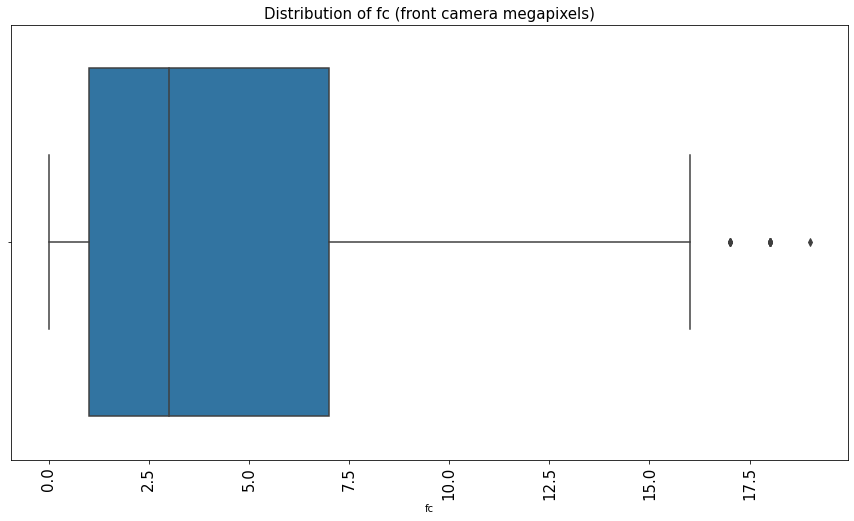

In [19]:

sns.boxplot(df_features['fc'])

plt.title('Distribution of fc (front camera megapixels)', fontsize = 15)

plt.xticks(rotation = 'vertical', fontsize = 15)

plt.show()

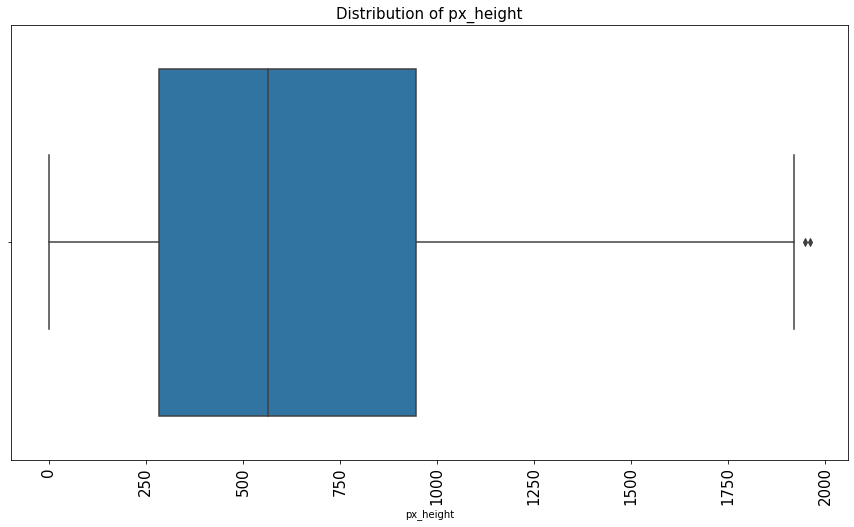

In [20]:

sns.boxplot(df_features['px_height'])

plt.title('Distribution of px_height', fontsize = 15)

plt.xticks(rotation = 'vertical', fontsize = 15)

plt.show()

**Remove outliers by IQR method**

In [21]:

Q1 = df_features.quantile(0.25)
Q3 = df_features.quantile(0.75)

IQR = Q3 - Q1

print(IQR)

battery_power     763.50
clock_speed         1.50
fc                  6.00
int_memory         32.00
m_dep               0.60
mobile_wt          61.00
n_cores             4.00
pc                 10.00
px_height         664.50
px_width          758.25
ram              1857.00
sc_h                7.00
sc_w                7.00
talk_time          10.00
dtype: float64


In [22]:

df_mobile = df_mobile[~((df_mobile < (Q1 - 1.5 * IQR)) | (df_mobile > (Q3 + 1.5 * IQR))).any(axis=1)]
df_mobile = df_mobile.reset_index(drop = True)

To confirm that the outliers have been removed; let us visualize the boxplot again.

**Plot the boxplot to recheck for outliers**

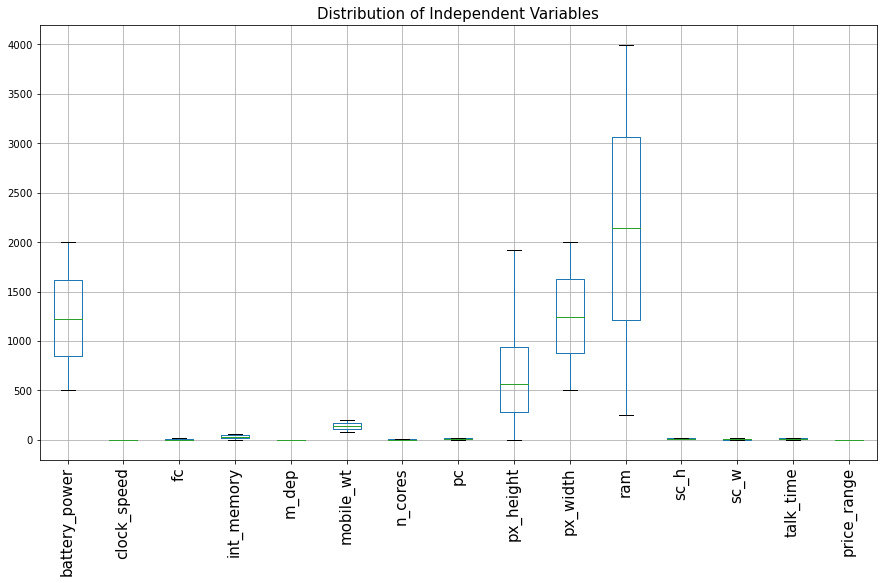

In [23]:
# plot multiple boxplots
df_mobile.boxplot()
plt.title('Distribution of Independent Variables', fontsize = 15)
plt.xticks(rotation = 'vertical', fontsize = 15)
plt.show()

In [24]:
# check the shape of the data after removal of outliers 
df_mobile.shape

(1980, 15)

<a id='Missing_Values'></a>
### Missing Values

In [25]:

Total = df_mobile.isnull().sum().sort_values(ascending = False)          
Percent = (df_mobile.isnull().sum()*100/df_mobile.isnull().count()).sort_values(ascending = False)   
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
price_range,0,0.0
talk_time,0,0.0
sc_w,0,0.0
sc_h,0,0.0
ram,0,0.0
px_width,0,0.0
px_height,0,0.0
pc,0,0.0
n_cores,0,0.0
mobile_wt,0,0.0


### There are no missing values.

We plot a heatmap for visualization of missing values.

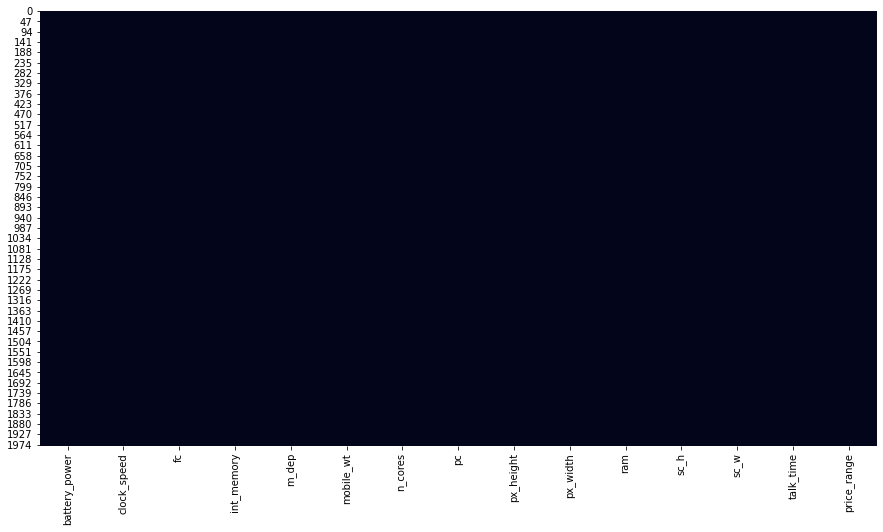

In [26]:

sns.heatmap(df_mobile.isnull(), cbar=False)

# display the plot
plt.show()

The horizontal lines in the heatmap correspond to the missing values. But there are no such line. This means there are no missing values.

### Separate the target variable from the independent variables

In [27]:
# store the target variable in the variable 'y'
y = df_mobile.price_range

# drop the target variable from the dataframe
df_mobile = df_mobile.drop('price_range', axis = 1)

<a id='Data_Preparation'></a>
##  Prepare the Data

We scale the variables to get all the variables in the same range. With this, we can avoid a problem in which some features come to dominate solely because they tend to have larger values than others.

In [28]:

df_num = df_mobile.apply(lambda rec: (rec - rec.mean()) / rec.std())

df_num.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,-0.897248,0.830652,-0.765253,-1.382209,0.338657,1.351754,-1.103004,-1.300985,-1.411916,-1.143741,0.390818,-0.787936,0.281378,1.465078
1,-0.490030,-1.249531,-1.005152,1.155467,0.685011,-0.117795,-0.666564,-0.636909,0.599639,1.710709,0.466425,1.112614,-0.636461,-0.733510
2,-1.531961,-1.249531,-0.525354,0.493465,1.377719,0.136550,0.206317,-0.636909,1.413354,1.080506,0.440608,-0.312799,-0.865920,-0.367079
3,-1.413663,1.197743,-1.005152,-1.216708,1.031365,-0.259098,0.642758,-0.138852,1.306525,1.242690,0.593666,0.875045,0.510837,-0.000648
4,1.329935,-0.392985,2.113534,0.658966,0.338657,0.023508,-1.103004,0.691243,1.288342,-0.087224,-0.658459,-1.025505,-0.865920,0.732215


In [29]:
X = df_num.copy()

In [30]:
X.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,-0.897248,0.830652,-0.765253,-1.382209,0.338657,1.351754,-1.103004,-1.300985,-1.411916,-1.143741,0.390818,-0.787936,0.281378,1.465078
1,-0.490030,-1.249531,-1.005152,1.155467,0.685011,-0.117795,-0.666564,-0.636909,0.599639,1.710709,0.466425,1.112614,-0.636461,-0.733510
2,-1.531961,-1.249531,-0.525354,0.493465,1.377719,0.136550,0.206317,-0.636909,1.413354,1.080506,0.440608,-0.312799,-0.865920,-0.367079
3,-1.413663,1.197743,-1.005152,-1.216708,1.031365,-0.259098,0.642758,-0.138852,1.306525,1.242690,0.593666,0.875045,0.510837,-0.000648
4,1.329935,-0.392985,2.113534,0.658966,0.338657,0.023508,-1.103004,0.691243,1.288342,-0.087224,-0.658459,-1.025505,-0.865920,0.732215


#### Create a generalized function to calculate the performance metrics for the test set.

In [31]:
# create a generalized function to calculate the performance metrics values for test set
def get_test_report(model):
    test_pred = model.predict(X_test)
    return(classification_report(y_test, test_pred))

#### Define a function to plot the confusion matrix.

In [32]:
# define a to plot a confusion matrix for the model
def plot_confusion_matrix(model):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1', 'Predicted:2','Predicted:3'],\
                               index = ['Actual:0','Actual:1', 'Actual:2','Actual:3'])
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.show()

<a id="knn"></a>
#  K Nearest Neighbors (KNN)

**Split the dataset into train and test sets**

In [33]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)
print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)

X_train (1386, 14)
y_train (1386,)
X_test (594, 14)
y_test (594,)


#### Build a knn model on a training dataset using euclidean distance.

In [34]:

knn_classification = KNeighborsClassifier(n_neighbors = 3)
knn_model = knn_classification.fit(X_train, y_train)

#### Build a confusion matrix.

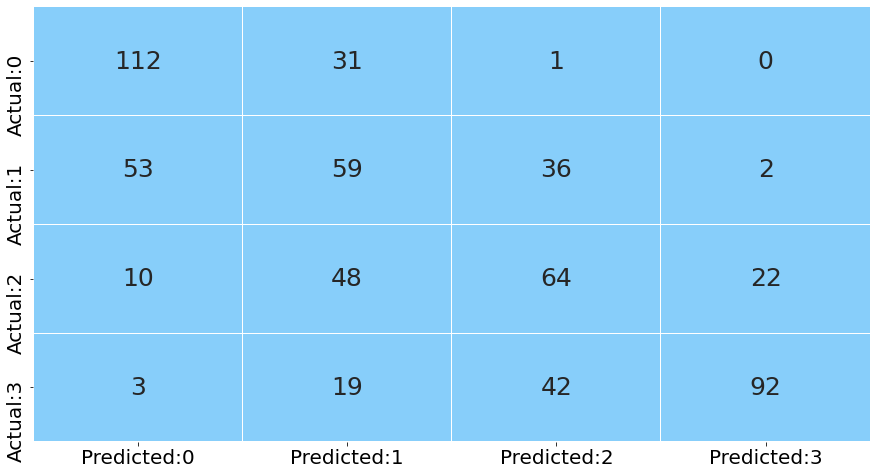

In [35]:

plot_confusion_matrix(knn_model)

**Calculate performance measures on the test set.**

In [36]:

test_report = get_test_report(knn_model)
print(test_report)

              precision    recall  f1-score   support

           0       0.63      0.78      0.70       144
           1       0.38      0.39      0.38       150
           2       0.45      0.44      0.45       144
           3       0.79      0.59      0.68       156

    accuracy                           0.55       594
   macro avg       0.56      0.55      0.55       594
weighted avg       0.56      0.55      0.55       594



**Interpretation:** The accuracy is 55% for this model.

<a id="hyper"></a>
## Optimal Value of K (using GridSearchCV)

In [37]:

tuned_paramaters = {'n_neighbors': np.arange(1, 25, 2),
                   'metric': ['hamming','euclidean','manhattan','Chebyshev']}
knn_classification = KNeighborsClassifier()
knn_grid = GridSearchCV(estimator = knn_classification, 
                        param_grid = tuned_paramaters, 
                        cv = 5, 
                        scoring = 'accuracy')
knn_grid.fit(X_train, y_train)
print('Best parameters for KNN Classifier: ', knn_grid.best_params_, '\n')

Best parameters for KNN Classifier:  {'metric': 'manhattan', 'n_neighbors': 21} 



#### Draw a line plot to see the error rate for each value of K using euclidean distance as a metric of KNN model

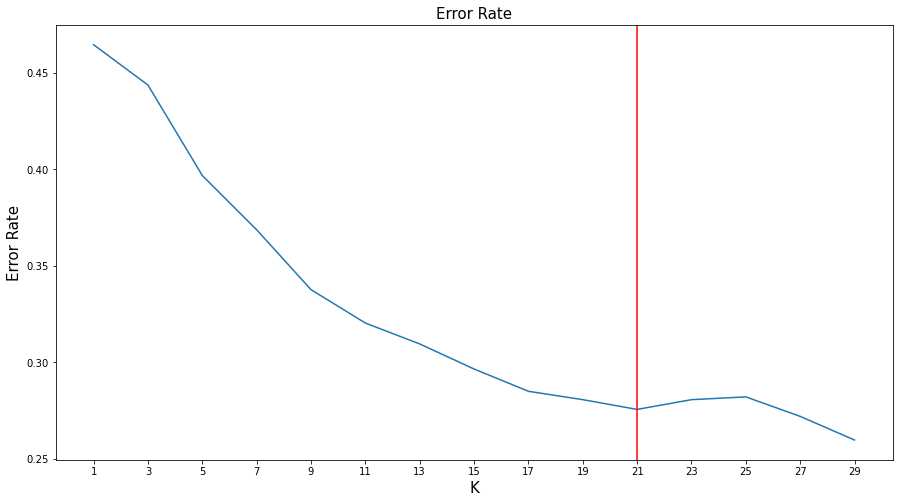

In [38]:

error_rate = []

for i in np.arange(1,30,2):
 
    knn = KNeighborsClassifier(i, metric = 'manhattan')

    score = cross_val_score(knn, X_train, y_train, cv = 5)
    score = score.mean()
    error_rate.append(1 - score)
plt.plot(range(1,30,2), error_rate)
plt.title('Error Rate', fontsize = 15)
plt.xlabel('K', fontsize = 15)
plt.ylabel('Error Rate', fontsize = 15)
plt.xticks(np.arange(1, 30, step = 2))
plt.axvline(x = 21, color = 'red')
plt.show()

**Interpretation:** We can see that the optimal value of K (= 21) obtained from the GridSearchCV() results in a lowest error rate. 

**Calculate performance measures on the test set.**

In [39]:

print('Classification Report for test set: \n', get_test_report(knn_grid))

Classification Report for test set: 
               precision    recall  f1-score   support

           0       0.77      0.87      0.82       144
           1       0.64      0.60      0.62       150
           2       0.59      0.67      0.62       144
           3       0.87      0.71      0.78       156

    accuracy                           0.71       594
   macro avg       0.72      0.71      0.71       594
weighted avg       0.72      0.71      0.71       594



**Interpretation:** The accuracy is 71% for this model.

**Kappa score for knn_model**

In [40]:
y_pred = knn_model.predict(X_test)

In [41]:
# compute the kappa value
kappa = cohen_kappa_score(y_test, y_pred)
print('kappa value:',kappa)

kappa value: 0.40144018477842447


**Interpretation:** As, the kappa score for the KNN model is 0.4014, we can say that there is fair agrrement between the actual and predicted values.

**Kappa score tuned KNN model i.e. knn_grid**

In [42]:
y_pred = knn_grid.predict(X_test)

In [43]:
# compute the kappa value
kappa = cohen_kappa_score(y_test, y_pred)
print('kappa value:',kappa)

kappa value: 0.6121164081078021


**Interpretation:** As, the kappa score for the tuned KNN model is 0.6121, we can say that there is substantial agrrement between the actual and predicted values. The tuned knn model with k=21 is better than the knn model with k=3.